# Pitney Bowes Challenge

## Team Members:

1. Amulya Singh
2. Chau Hoang
3. Shani Batat
4. Tanay Mukherjee

### All packages and libraries

In [33]:
#!pip install <name of any package that's not loaded already in your system>

In [34]:
# To ignore warnings 
import warnings
warnings.filterwarnings('ignore')

In [35]:
# Data Manipulation 
import numpy as np
import pandas as pd

# Standard operating libraries
import io, os, sys, types, time, datetime, math, random, requests, subprocess, tempfile

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# For EDA
import dabl

# Feature Selection and Encoding
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Split a dataset into train and test sets
from sklearn.model_selection import train_test_split

# Machine learning 
import sklearn.ensemble as ske
from sklearn.model_selection import cross_val_score
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Grid and Random Search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Classification metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

### Part A: Data Pre-processing

In [36]:
# Read the files
df = pd.read_csv("C:\\Users\\its_t\\Downloads\\Pitney Bowes\\train.csv")

#### Training dataset

In [37]:
# File info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40500 entries, 0 to 40499
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   deviceid                     40500 non-null  int64  
 1   avg_time_charging_lag1       40500 non-null  float64
 2   avg_time_charging_lag2       40500 non-null  float64
 3   avg_time_charging_lag3       40500 non-null  float64
 4   avg_time_charging_lag7       40434 non-null  float64
 5   charging_rate_lag3           40500 non-null  float64
 6   charging_rate_lag7           40488 non-null  float64
 7   avg_time_discharging_lag1    40500 non-null  float64
 8   avg_time_discharging_lag2    40500 non-null  float64
 9   avg_time_discharging_lag3    40500 non-null  float64
 10  avg_time_discharging_lag7    40434 non-null  float64
 11  discharging_rate_lag3        40500 non-null  float64
 12  discharging_rate_lag7        40488 non-null  float64
 13  fail_7          

In [38]:
# To print top 10 records from the file
df.head(10)

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,...,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,LastRecord,Date Deployed
0,28647,5.12,41.11,6.56,25.39,0.086667,-0.006667,4.37,91.70,15.70,...,2.375000,377.080000,367.428750,21.696250,39.005000,4174.875000,14.200000,60.701250,4/1/2021,10/6/2019
1,36175,36.60,5.16,6.23,6.96,0.136667,-1.296667,62.67,6.53,6.16,...,1.000000,350.517857,350.309286,19.883571,32.213571,4161.000000,19.777778,52.097143,4/1/2021,10/27/2019
2,16107,5.51,5.04,4.52,5.96,-0.460000,-0.083333,5.13,5.65,4.14,...,4.095238,346.113333,343.409524,13.675238,20.471429,4152.238095,19.200000,34.146667,4/1/2021,10/31/2019
3,27362,4.66,39.85,35.76,40.69,0.076667,-0.006667,3.93,76.37,60.86,...,0.736842,356.184211,349.844737,16.306842,26.189474,4164.631579,23.625000,42.496316,4/1/2021,10/1/2019
4,19463,5.10,43.24,4.63,5.26,0.040000,-0.153333,4.69,71.44,3.80,...,1.133333,370.904000,367.730000,18.797333,30.812000,4169.800000,12.666667,49.609333,4/1/2021,9/13/2019
5,30054,27.74,5.12,42.39,5.46,0.076667,-0.020000,45.90,3.99,75.64,...,2.150000,350.345500,346.747500,12.878500,19.621000,4151.600000,6.375000,32.499500,4/1/2021,10/5/2019
6,26431,4.67,5.32,23.99,4.62,0.270000,-0.010000,3.56,4.62,18.57,...,1.956522,358.789130,353.025652,17.384783,27.495217,4170.652174,20.500000,44.880000,4/1/2021,9/13/2019
7,5491,11.49,7.10,18.48,NaN,-0.650000,0.063333,18.21,10.88,23.40,...,0.428571,345.727143,342.172857,19.920000,34.582857,4171.285714,7.166667,54.502857,4/1/2021,11/11/2019
8,43953,35.88,46.05,5.43,4.77,0.830000,-2.486667,47.08,85.63,6.50,...,0.785714,330.151429,332.997857,18.780714,30.125000,4137.428571,3.857143,48.905714,4/1/2021,11/2/2019
9,45081,4.80,41.35,6.09,27.60,-0.003333,0.000000,3.41,75.23,8.67,...,2.666667,356.720952,348.738571,16.782381,26.645238,4157.761905,9.500000,43.427619,4/1/2021,9/19/2019


In [39]:
# Records - rows and columns
df.shape

(40500, 55)

In [40]:
# Summarize the data for each feature
df.describe(include='all')

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,...,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,LastRecord,Date Deployed
count,40500.000000,40500.000000,40500.000000,40500.000000,40434.000000,40500.000000,40488.000000,40500.000000,40500.000000,40500.000000,...,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500,40500
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,164
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4/1/2021,9/20/2019
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40500,877
mean,27511.156593,16.274839,16.521473,16.277490,16.355088,-0.043389,-0.053017,25.800928,26.353566,25.903624,...,2.154864,351.421779,348.207773,16.352522,26.081939,4159.266095,20.526154,42.434462,NaN,NaN
std,12992.647611,15.374342,15.425769,15.305041,15.137390,0.776305,0.756558,29.243961,29.459305,29.269789,...,2.223237,12.745409,13.277782,3.553653,6.813312,11.306765,16.461988,10.321011,NaN,NaN
min,5000.000000,1.510000,1.060000,0.040000,1.070000,-76.946667,-42.130000,0.520000,0.700000,1.070000,...,0.090909,304.050833,298.250000,4.890000,4.131111,4112.454545,1.000000,9.021111,NaN,NaN
25%,16234.750000,4.910000,4.920000,4.900000,4.900000,-0.066667,-0.100000,4.200000,4.210000,4.200000,...,1.052632,342.770532,339.267541,13.912625,21.418250,4151.666667,11.333333,35.364068,NaN,NaN
50%,27528.000000,5.770000,5.830000,5.780000,5.780000,0.000000,-0.003333,5.860000,5.920000,5.850000,...,1.470588,351.109967,347.911440,16.201115,25.774365,4159.158948,16.500000,42.005895,NaN,NaN
75%,38785.250000,30.100000,30.730000,30.060000,29.600000,0.046667,0.060000,50.200000,51.212500,50.300000,...,2.353416,359.687861,356.837450,18.660114,30.476042,4166.800000,24.285714,49.115667,NaN,NaN


In [41]:
# Correlation table
df.corr(method='pearson')

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,...,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time
deviceid,1.000000,0.004142,-0.001142,0.002691,0.003504,-0.004674,-0.001521,0.004854,-0.000761,0.002166,...,0.000777,0.009035,-0.002188,0.001162,-0.000333,0.000704,0.001197,0.000564,-0.002132,0.001033
avg_time_charging_lag1,0.004142,1.000000,0.001707,0.001525,-0.005240,0.011670,-0.003474,0.979988,0.001834,0.001580,...,-0.192962,-0.010313,-0.022071,-0.067691,-0.080069,0.241628,0.235666,-0.086113,-0.001742,0.238768
avg_time_charging_lag2,-0.001142,0.001707,1.000000,-0.010682,-0.000641,-0.000856,-0.000638,0.001050,0.980808,-0.009903,...,-0.193316,-0.006186,-0.007043,-0.074024,-0.088043,0.242112,0.236300,-0.090766,0.010125,0.239353
avg_time_charging_lag3,0.002691,0.001525,-0.010682,1.000000,-0.005379,-0.001756,-0.002851,0.001107,-0.012405,0.981309,...,-0.199595,-0.009667,-0.000146,-0.072953,-0.084776,0.242527,0.238656,-0.089027,0.011651,0.241052
avg_time_charging_lag7,0.003504,-0.005240,-0.000641,-0.005379,1.000000,-0.004053,-0.000357,-0.006494,0.001475,-0.004824,...,-0.189267,-0.010842,-0.016543,-0.070883,-0.082705,0.233331,0.229206,-0.089236,-0.001513,0.231647
charging_rate_lag3,-0.004674,0.011670,-0.000856,-0.001756,-0.004053,1.000000,0.005428,0.010883,-0.000590,-0.002937,...,0.000019,0.001547,-0.001121,0.006415,0.006845,0.009668,0.001095,0.002644,-0.000853,0.004052
charging_rate_lag7,-0.001521,-0.003474,-0.000638,-0.002851,-0.000357,0.005428,1.000000,-0.003747,-0.000784,-0.002533,...,-0.000433,-0.003858,0.009302,0.005693,0.005266,0.012703,0.003128,-0.000739,-0.005071,0.006438
avg_time_discharging_lag1,0.004854,0.979988,0.001050,0.001107,-0.006494,0.010883,-0.003747,1.000000,0.001424,0.001240,...,-0.191629,-0.009054,-0.018617,-0.064333,-0.077280,0.235632,0.239623,-0.084580,-0.002680,0.239316
avg_time_discharging_lag2,-0.000761,0.001834,0.980808,-0.012405,0.001475,-0.000590,-0.000784,0.001424,1.000000,-0.011497,...,-0.195250,-0.004895,-0.003594,-0.070928,-0.085794,0.238905,0.242819,-0.089744,0.010238,0.242553
avg_time_discharging_lag3,0.002166,0.001580,-0.009903,0.981309,-0.004824,-0.002937,-0.002533,0.001240,-0.011497,1.000000,...,-0.199403,-0.007473,0.002562,-0.070887,-0.083501,0.239485,0.244503,-0.089013,0.010613,0.243864


### Part B: Data Wrangling

In [42]:
# Check for total null values
df.isnull().values.sum()

33713

In [43]:
# Null or NAs by column
naColumns = df.isnull().sum()

# Sort features in ascending order with no. of NAs
naColumns.sort_values()

deviceid                          0
discharging_rate_lag5             0
charging_rate_lag4                0
charging_rate_lag5                0
chargecycles                      0
dischargecycles                   0
total_off_time                    0
discharging_rate_lag4             0
number_times_restart              0
avg_volt_change_discharging       0
avg_time_charging                 0
avg_time_discharging              0
max_voltage_day                   0
piececount                        0
cycle_time                        0
avg_volt_change_charging          0
LastRecord                        0
Date Deployed                     0
charge_cycle_time_below_12        0
avg_time_charging_lag1            0
avg_time_charging_lag2            0
avg_time_charging_lag3            0
charging_rate_lag3                0
avg_time_discharging_lag1         0
avg_time_discharging_lag2         0
avg_time_discharging_lag3         0
discharging_rate_lag3             0
avg_time_discharging_lag4   

Text(0.5, 0, 'Top 20 variables with missing values')

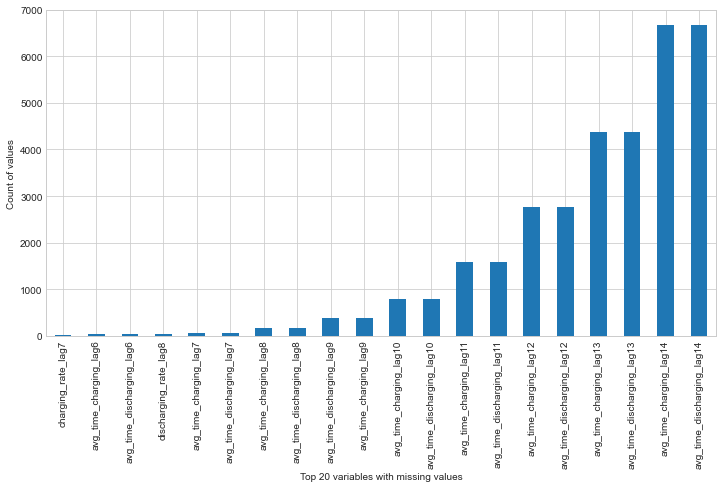

In [44]:
x = naColumns.sort_values().tail(20)

# Plot the count of missing NA values by features
x.plot.bar(figsize=(12,6))
plt.ylabel('Count of values')
plt.xlabel('Top 20 variables with missing values')

In [45]:
# Fill the missing NAs for rows now
def filling(df):
    for i in df:
        if df[i].dtypes == object:
            # The non-numerical ones to be replaced by the most common occurences
            fill = df[i].mode().iat[0]
            df.loc[:,i] = df[i].replace(np.nan,fill)
        else:
            # The numeric ones will be replaces by median values for the fature
            the_mean = df[i].median(skipna=True)
            df.loc[:,i] = df[i].replace(np.nan,the_mean)

filling(df)

In [46]:
# Should show no more NAs
df.isnull().values.sum()

0

### Part C: Exploratory Data Analysis

In [47]:
# Checking for feature type
types = dabl.detect_types(df)
print(types)

                             continuous  dirty_float  low_card_int  \
deviceid                           True        False         False   
avg_time_charging_lag1             True        False         False   
avg_time_charging_lag2             True        False         False   
avg_time_charging_lag3             True        False         False   
avg_time_charging_lag7             True        False         False   
charging_rate_lag3                 True        False         False   
charging_rate_lag7                 True        False         False   
avg_time_discharging_lag1          True        False         False   
avg_time_discharging_lag2          True        False         False   
avg_time_discharging_lag3          True        False         False   
avg_time_discharging_lag7          True        False         False   
discharging_rate_lag3              True        False         False   
discharging_rate_lag7              True        False         False   
fail_7              

Target looks like classification
Showing only top 10 of 51 continuous features
Linear Discriminant Analysis training set score: 0.501


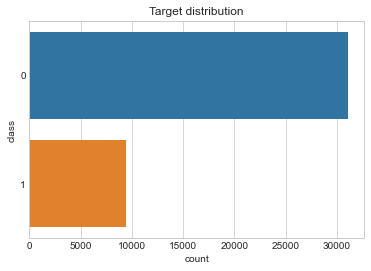

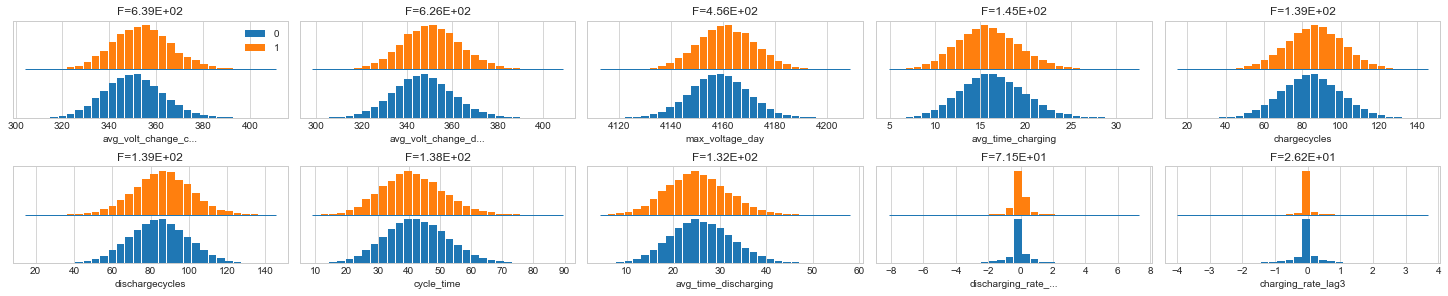

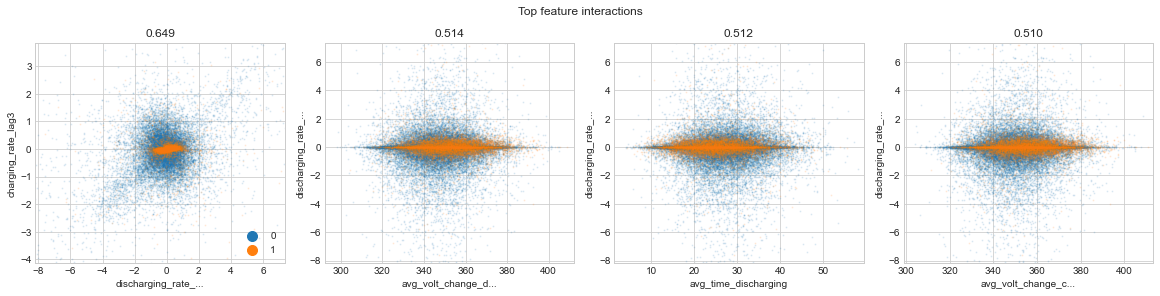

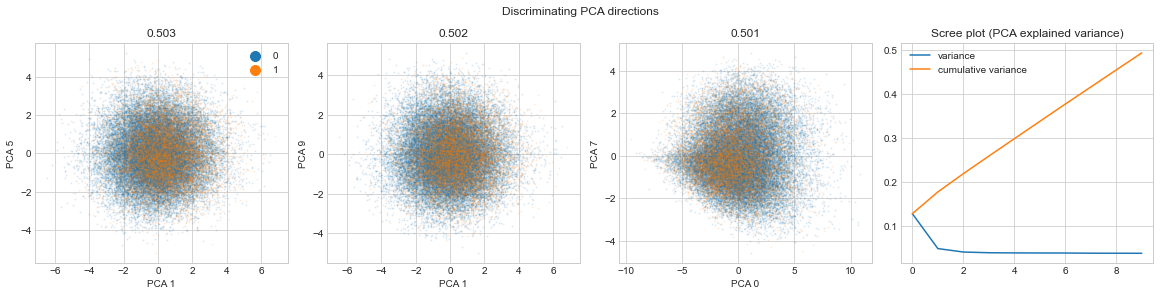

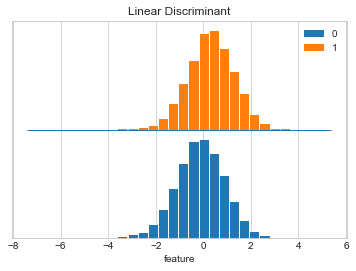

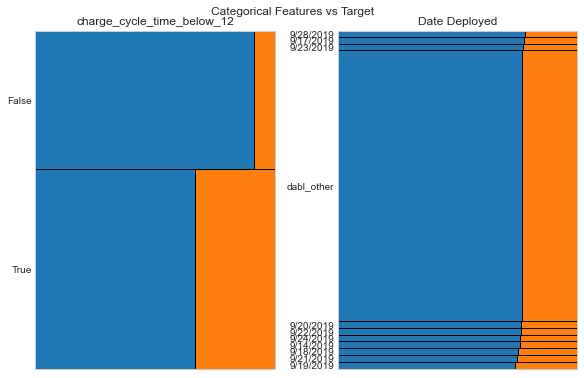

In [26]:
# What do we have for our classification variable - 'fail_7'
dabl.plot(df, target_col="fail_7")

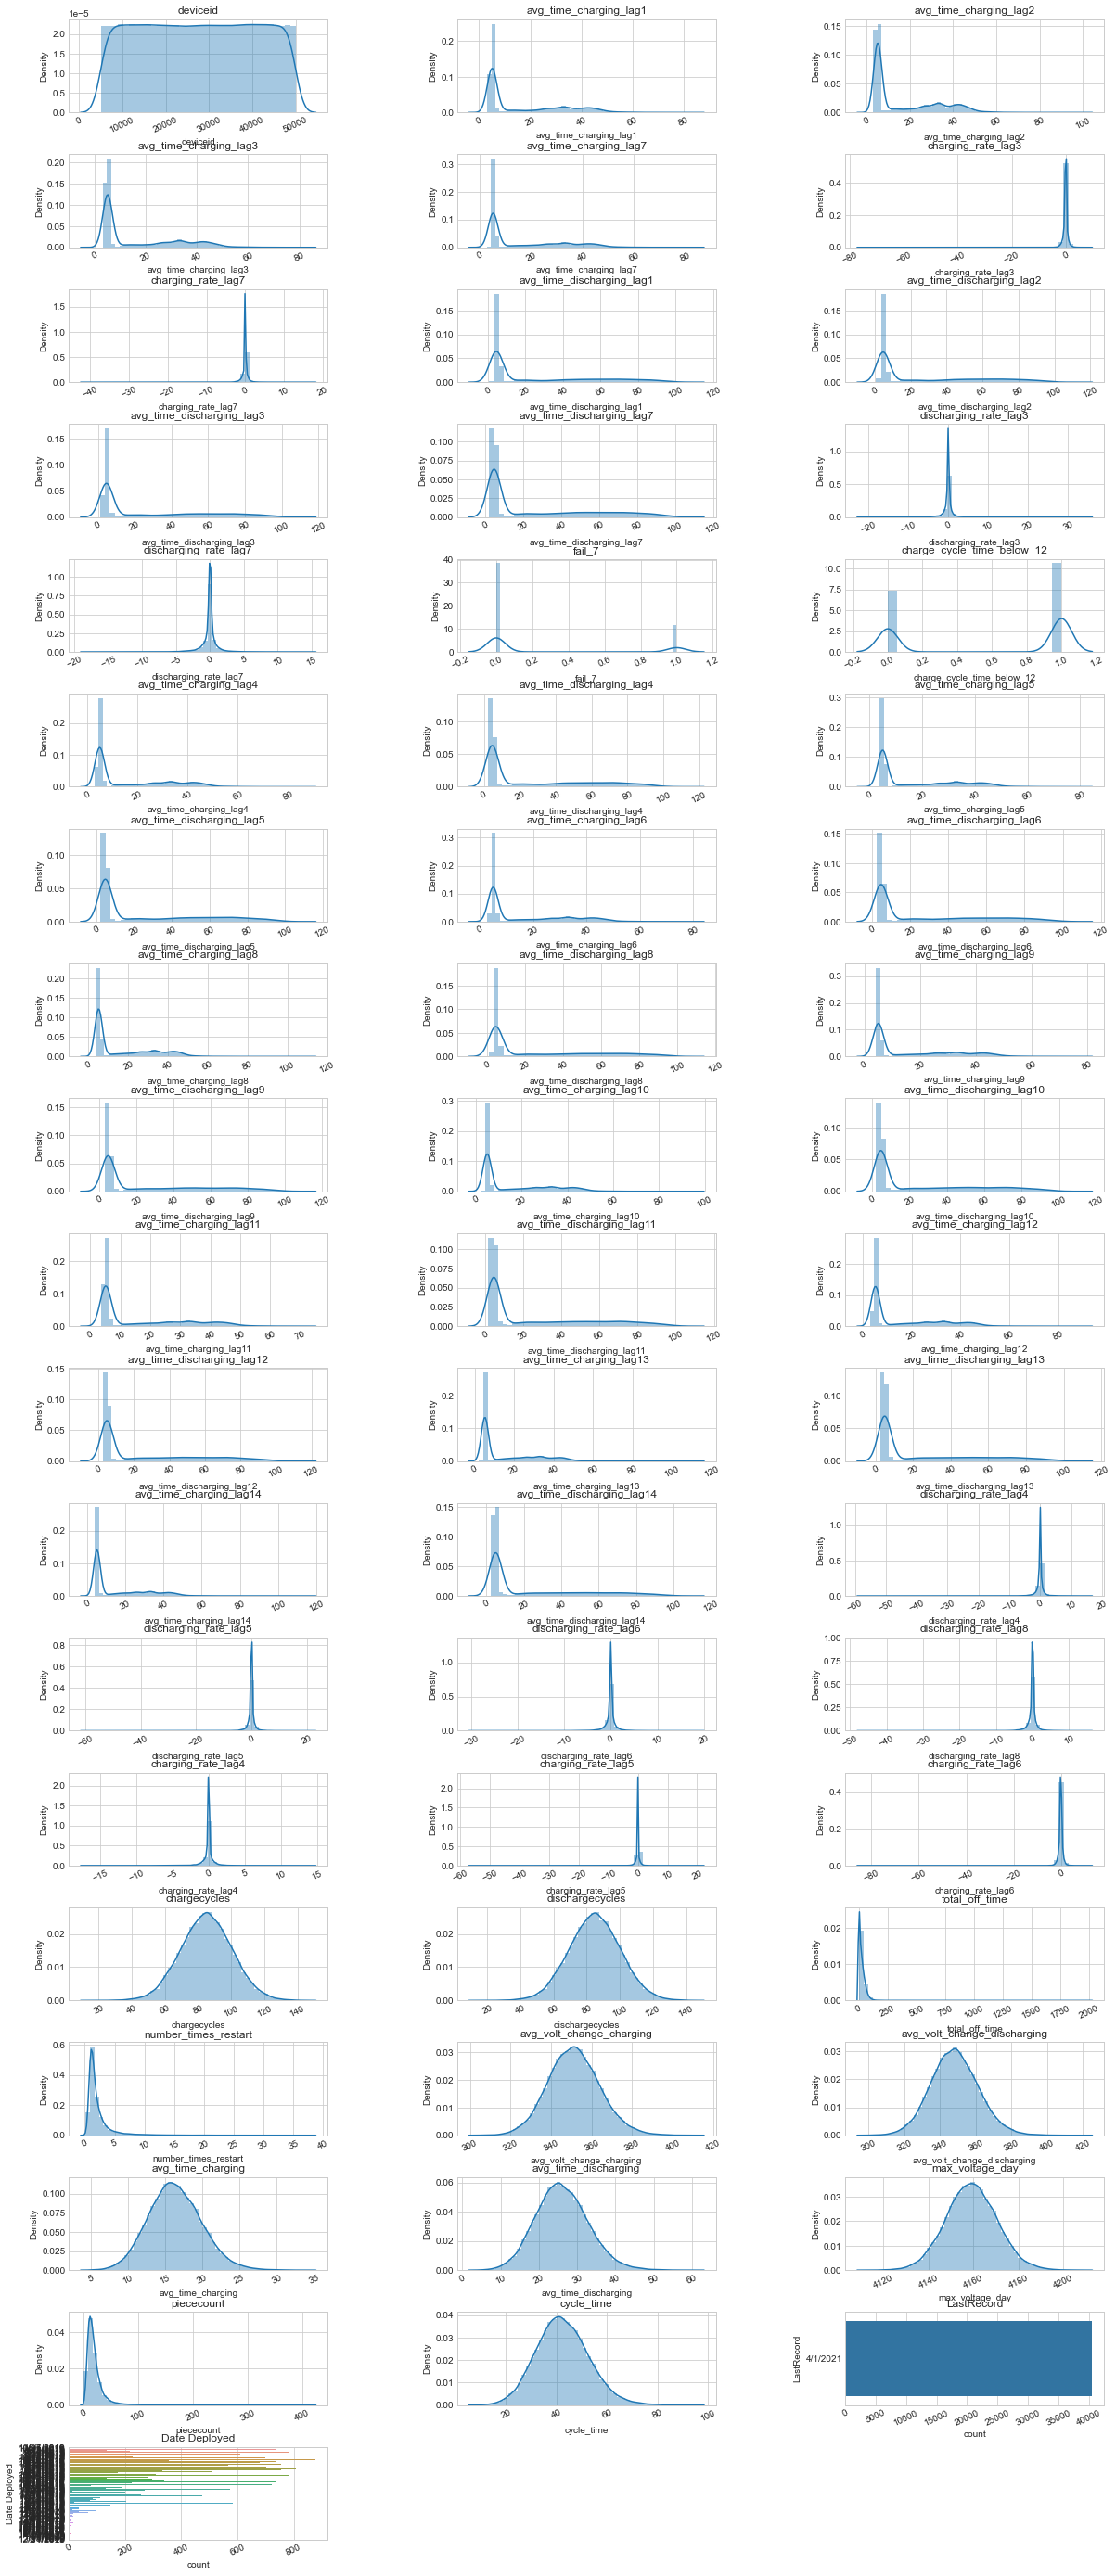

In [20]:
# Plotting the distribution of each feature
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(df, cols=3, width=20, height=50, hspace=0.45, wspace=0.5)

In [48]:
# Dropping the features which are of object type but have no use in the feature selection or modeling
del df['LastRecord']
del df['Date Deployed']

### Part D: Featured Engineering

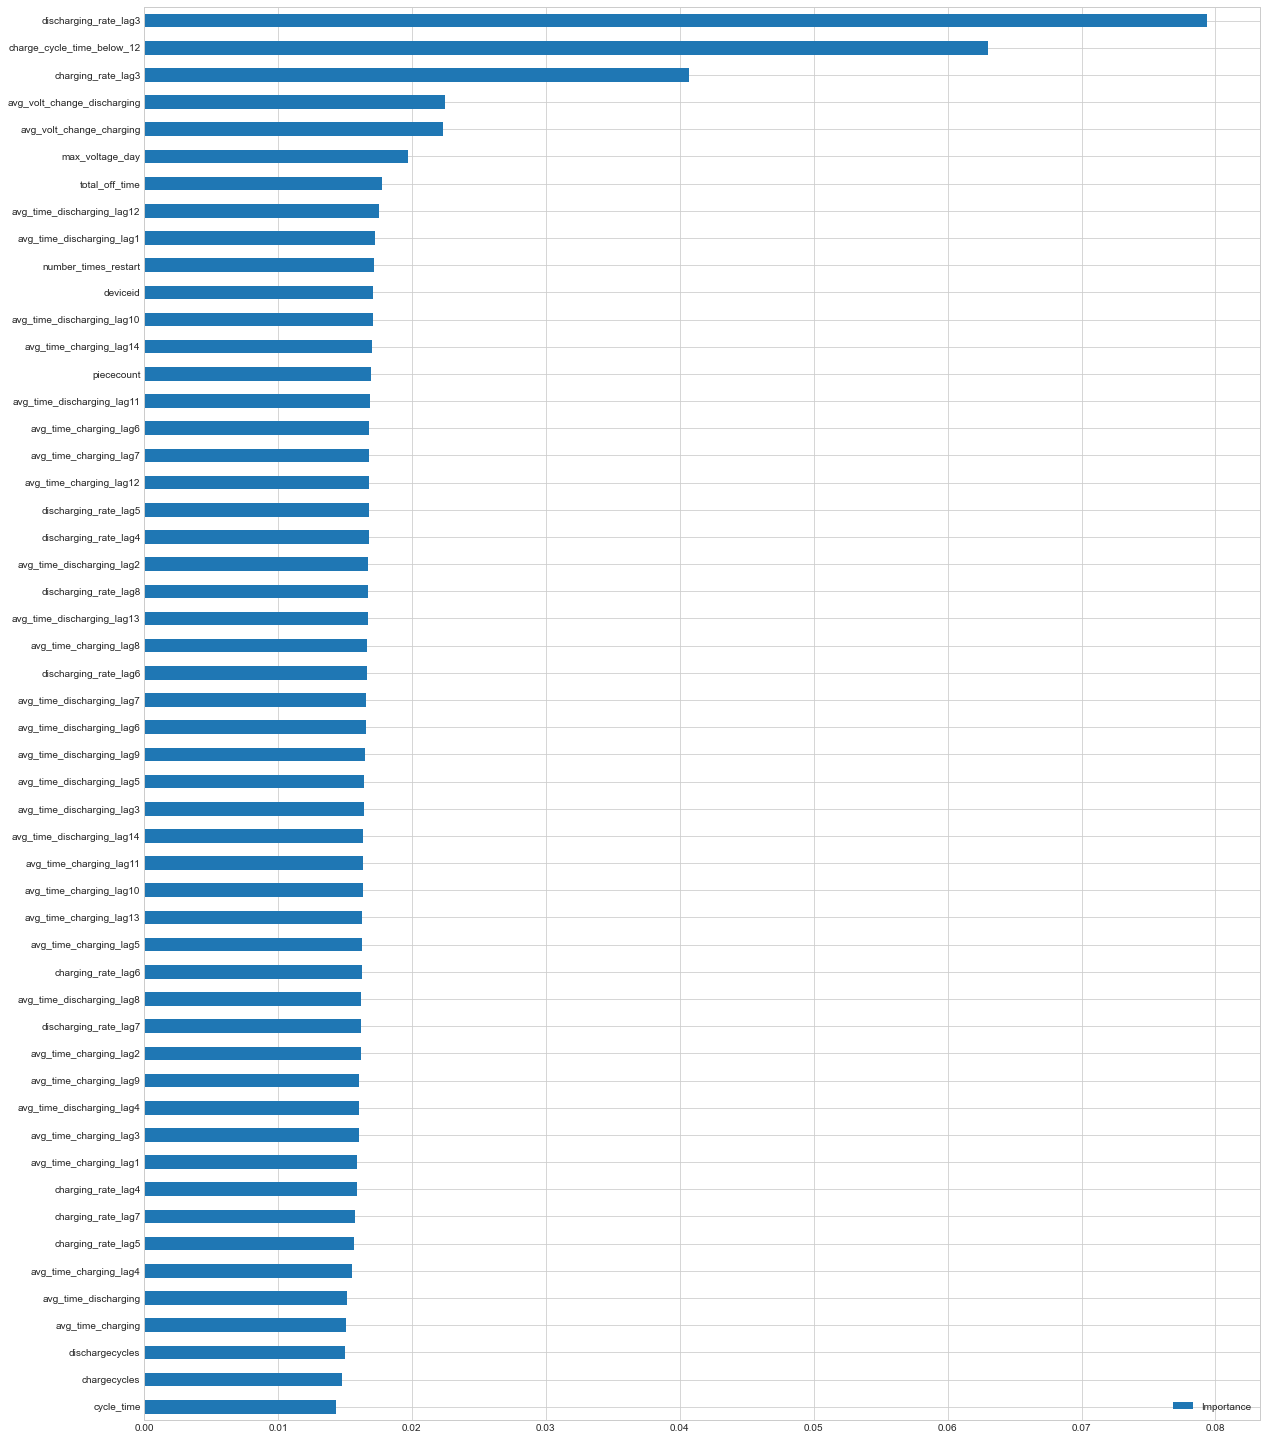

In [28]:
# Using Random Forest to gain an insight on Feature Importance
clf = RandomForestClassifier()
clf.fit(df.drop('fail_7', axis=1), df['fail_7'])

plt.style.use('seaborn-whitegrid')
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=df.drop('fail_7', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));

<BarContainer object of 52 artists>

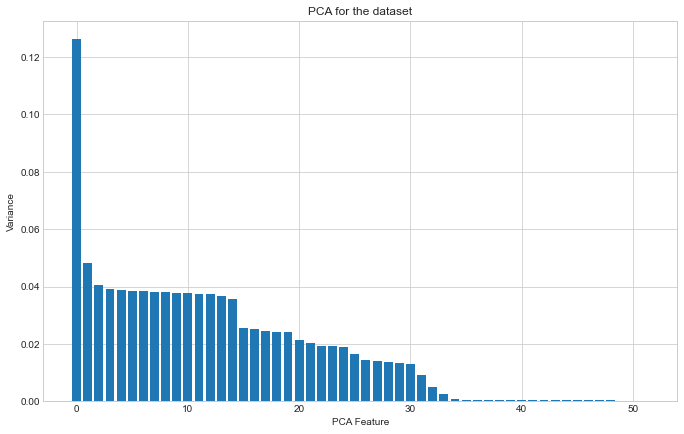

In [29]:
# Calculating PCA for dataset, and graphing the Variance for each feature
std_scale = preprocessing.StandardScaler().fit(df.drop('fail_7', axis=1))
X = std_scale.transform(df.drop('fail_7', axis=1))
pca1 = PCA(n_components=len(df.columns)-1)
fit1 = pca1.fit(X)

# Graphing the variance per feature
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(25,7)) 

plt.subplot(1, 2, 1)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA for the dataset')
plt.bar(range(0, fit1.explained_variance_ratio_.size), fit1.explained_variance_ratio_)

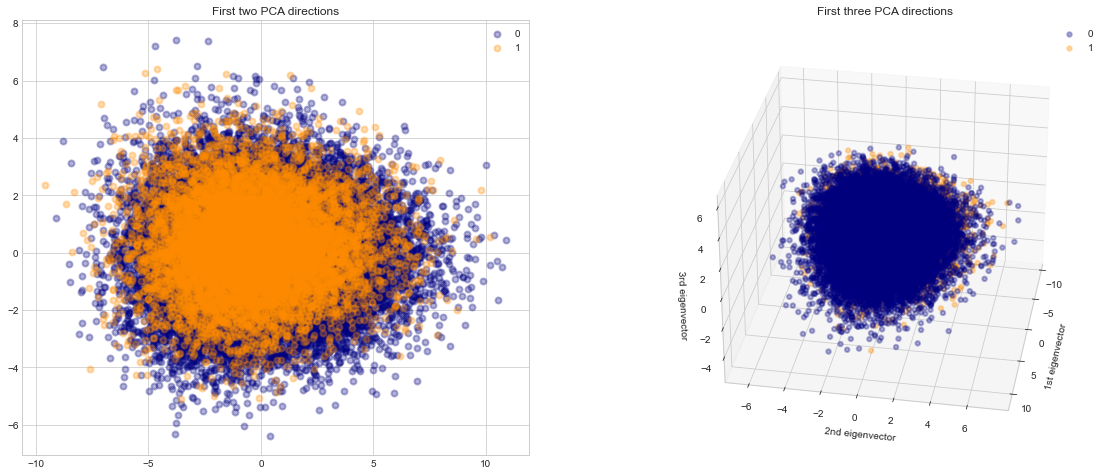

In [30]:
# PCA's components graphed in 2D and 3D

# Apply Scaling 
std_scale = preprocessing.StandardScaler().fit(df.drop('fail_7', axis=1))
X = std_scale.transform(df.drop('fail_7', axis=1))
y = df['fail_7']

# Formatting
target_names = [0,1]
colors = ['navy','darkorange']
lw = 2
alpha = 0.3

# 2 Components PCA
plt.style.use('seaborn-whitegrid')
plt.figure(2, figsize=(20, 8))

plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
                color=color, 
                alpha=alpha, 
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('First two PCA directions');

# 3 Components PCA
ax = plt.subplot(1, 2, 2, projection='3d')

pca = PCA(n_components=3)
X_reduced = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2], 
               color=color,
               alpha=alpha,
               lw=lw, 
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

# Rotate the axes
ax.view_init(30, 10)


Feature Ranking For Non-Discretised: [51 26 20 18 19 36 43 46 34 42 39  2 37  1 38 30 25 27 23 33 10 11 14 15
  9 24 17 16  8 12 29 35  7 31 40 47 52 49 45 44 50 22 28 48  3 21 13  4
  5 32 41  6]
Optimal number of features : 1


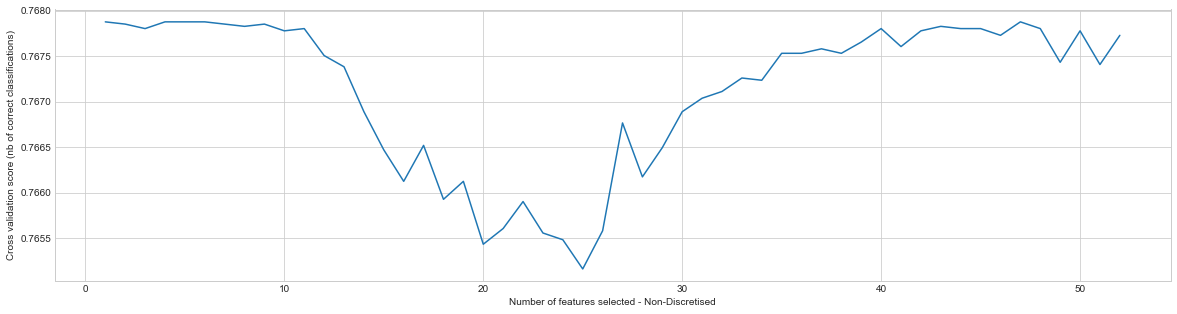

In [26]:
'''
# Calculating RFE for non-discretised dataset, and graphing the importance for each feature

# Using RFECV method
# n_jobs = -1 means using all processors
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html
selector = RFECV(LogisticRegression(), step=1, cv=10, n_jobs=-1)

selector = selector.fit(df.drop('fail_7', axis=1).values, df['fail_7'].values)
print("Feature Ranking For Non-Discretised: %s" % selector.ranking_)
print("Optimal number of features : %d" % selector.n_features_)

# Plot number of features VS. cross-validation scores
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,5)) 
plt.xlabel("Number of features selected - Non-Discretised")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_);

# Feature space could be subsetted like so
df_rfe = df[df.columns[np.insert(selector.support_, 0, True)]]
'''

Feature Ranking For Non-Discretised: [47 18 13 17 11 31 36 35 29 42 37  1 32  1 33 19  4 25 12 27  9 15 26 22
 28 20  2  3  7 14  8 30 16 21 34 44 41 45 40 38 46  1  5 43 24 10  6  1
  1 23 39  1]
Optimal number of features : 6


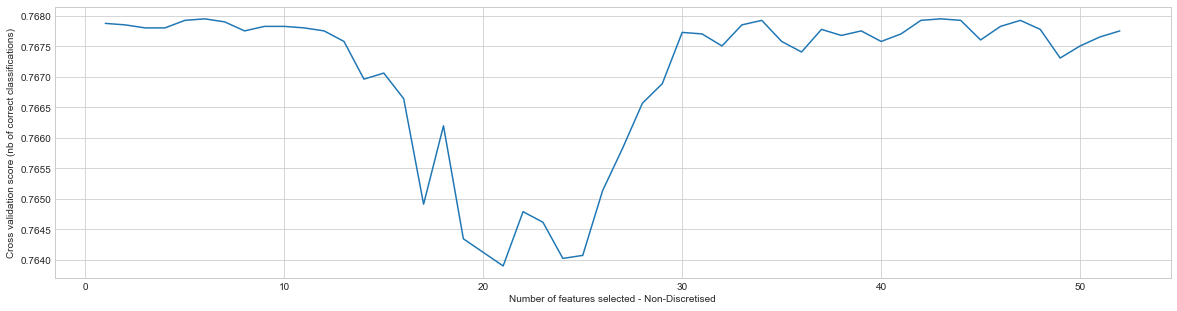

In [49]:
# Calculating RFE for non-discretised dataset, and graphing the importance for each feature

# Using RFECV method
# n_jobs = -1 means using all processors
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html
selector = RFECV(LogisticRegression(), step=1, cv=5, n_jobs=-1)

selector = selector.fit(df.drop('fail_7', axis=1).values, df['fail_7'].values)
print("Feature Ranking For Non-Discretised: %s" % selector.ranking_)
print("Optimal number of features : %d" % selector.n_features_)

# Plot number of features VS. cross-validation scores
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,5)) 
plt.xlabel("Number of features selected - Non-Discretised")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_);

# Feature space could be subsetted like so
df_rfe = df[df.columns[np.insert(selector.support_, 0, True)]]

In [50]:
# Checking the name of columns in selection for the modeling
df_rfe.columns

Index(['deviceid', 'discharging_rate_lag7', 'charge_cycle_time_below_12',
       'chargecycles', 'avg_time_charging', 'avg_time_discharging',
       'cycle_time'],
      dtype='object')

### Part E: Machine Learning - Model Preparation

In [51]:
# Split a dataset into train and test sets
from sklearn.model_selection import train_test_split

X = df.drop ('fail_7', axis=1)
y = df['fail_7']

# Split into train and validation sets
# NOTE: Validation test set is called test here but we will test it on test data later
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [52]:
# Records - rows and columns for train and test after the split
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(36450, 52) (36450,)
(4050, 52) (4050,)


In [53]:
# Setting a random seed will guarantee we get the same results every time we run our training and testing.
random.seed(1)

In [54]:
# calculate the FPR and TPR for all thresholds of the classification
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [55]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier, 
                          GaussianNB, 
                          DecisionTreeClassifier, 
                          RandomForestClassifier,
                          GradientBoostingClassifier))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2) 
    # CV 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs

In [56]:
# Logistic Regression - Random Search for Hyperparameters

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {'penalty': ['l2', 'l1'], 
                         'class_weight': [None, 'balanced'],
                         'C': np.logspace(-20, 20, 10000), 
                         'intercept_scaling': np.logspace(-20, 20, 10000)}

# Run Randomized Search
n_iter_search = 10
lrc = LogisticRegression()
random_search = RandomizedSearchCV(lrc, 
                                   n_jobs=-1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 7.22 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.767 (std: 0.000)
Parameters: {'penalty': 'l2', 'intercept_scaling': 4.2979694711265716e-08, 'class_weight': None, 'C': 67155673391.44571}

Model with rank: 2
Mean validation score: 0.767 (std: 0.000)
Parameters: {'penalty': 'l2', 'intercept_scaling': 1.0485811836280471e-14, 'class_weight': None, 'C': 0.6280291441834273}

Model with rank: 3
Mean validation score: 0.584 (std: 0.006)
Parameters: {'penalty': 'l2', 'intercept_scaling': 70873.69062820199, 'class_weight': 'balanced', 'C': 2.3852711411269393e-05}

Model with rank: 4
Mean validation score: 0.584 (std: 0.007)
Parameters: {'penalty': 'l2', 'intercept_scaling': 1.8396130114537686e-13, 'class_weight': 'balanced', 'C': 6241364234611.469}

Model with rank: 5
Mean validation score: 0.584 (std: 0.006)
Parameters: {'penalty': 'l2', 'intercept_scaling': 54837027756.86492, 'class_weight': 'balanced', 'C': 65884291.2212690

### Part F: Machine Learning - Model Execution

In [57]:
# Logistic Regression
start_time = time.time()
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log = fit_ml_algo(LogisticRegression(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 77.09
Accuracy CV 10-Fold: 76.74
Running Time: 0:00:06.462439


In [58]:
# Print the confusion matrix
print(metrics.classification_report(y_train, train_pred_log))
print(metrics.classification_report(y_test, test_pred_log))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     27977
           1       0.44      0.00      0.01      8473

    accuracy                           0.77     36450
   macro avg       0.61      0.50      0.44     36450
weighted avg       0.69      0.77      0.67     36450

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3122
           1       0.50      0.00      0.01       928

    accuracy                           0.77      4050
   macro avg       0.64      0.50      0.44      4050
weighted avg       0.71      0.77      0.67      4050



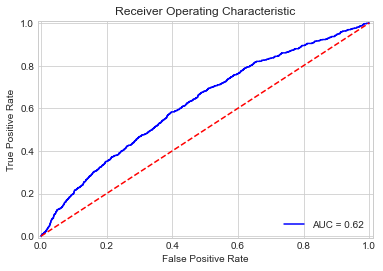

In [59]:
plot_roc_curve(y_test, probs_log)

In [60]:
# K-Nearest Neighbors (KNN)
start_time = time.time()
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3,
                                                                                                 n_jobs = -1), 
                                                                                                 X_train, 
                                                                                                 y_train, 
                                                                                                 X_test, 
                                                                                                 10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 69.48
Accuracy CV 10-Fold: 69.96
Running Time: 0:00:05.081164


In [61]:
# Print the confusion matrix
print(metrics.classification_report(y_train, train_pred_knn))
print(metrics.classification_report(y_test, test_pred_knn))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82     27977
           1       0.23      0.13      0.16      8473

    accuracy                           0.70     36450
   macro avg       0.50      0.50      0.49     36450
weighted avg       0.64      0.70      0.67     36450

              precision    recall  f1-score   support

           0       0.77      0.86      0.81      3122
           1       0.21      0.12      0.16       928

    accuracy                           0.69      4050
   macro avg       0.49      0.49      0.49      4050
weighted avg       0.64      0.69      0.66      4050



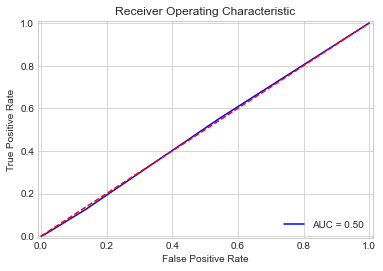

In [62]:
plot_roc_curve(y_test, probs_knn)

In [63]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, test_pred_gaussian, acc_gaussian, acc_cv_gaussian, probs_gau = fit_ml_algo(GaussianNB(), 
                                                                                     X_train, 
                                                                                     y_train, 
                                                                                     X_test, 
                                                                                     10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 62.64
Accuracy CV 10-Fold: 60.98
Running Time: 0:00:01.218741


In [64]:
# Print the confusion matrix
print(metrics.classification_report(y_train, train_pred_gaussian))
print(metrics.classification_report(y_test, test_pred_gaussian))

              precision    recall  f1-score   support

           0       0.85      0.60      0.70     27977
           1       0.33      0.64      0.43      8473

    accuracy                           0.61     36450
   macro avg       0.59      0.62      0.57     36450
weighted avg       0.73      0.61      0.64     36450

              precision    recall  f1-score   support

           0       0.86      0.62      0.72      3122
           1       0.34      0.66      0.45       928

    accuracy                           0.63      4050
   macro avg       0.60      0.64      0.58      4050
weighted avg       0.74      0.63      0.66      4050



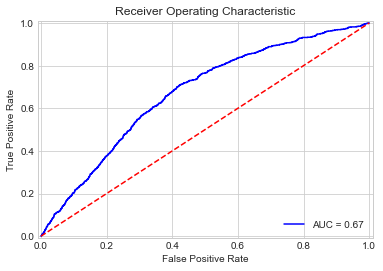

In [65]:
plot_roc_curve(y_test, probs_gau)

In [66]:
# Linear Support Vector Classification (SVC)
start_time = time.time()
train_pred_svc, test_pred_svc, acc_linear_svc, acc_cv_linear_svc, _ = fit_ml_algo(LinearSVC(),
                                                                                           X_train, 
                                                                                           y_train,
                                                                                           X_test, 
                                                                                           10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 77.09
Accuracy CV 10-Fold: 57.44
Running Time: 0:01:02.114354


In [67]:
# Print the confusion matrix
print(metrics.classification_report(y_train, train_pred_svc))
print(metrics.classification_report(y_test, test_pred_svc))

              precision    recall  f1-score   support

           0       0.77      0.64      0.70     27977
           1       0.24      0.37      0.29      8473

    accuracy                           0.57     36450
   macro avg       0.50      0.50      0.49     36450
weighted avg       0.65      0.57      0.60     36450

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3122
           1       0.00      0.00      0.00       928

    accuracy                           0.77      4050
   macro avg       0.39      0.50      0.44      4050
weighted avg       0.59      0.77      0.67      4050



In [68]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, test_pred_sgd, acc_sgd, acc_cv_sgd, _ = fit_ml_algo(SGDClassifier(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 70.49
Accuracy CV 10-Fold: 60.12
Running Time: 0:00:12.084021


In [69]:
# Print the confusion matrix
print(metrics.classification_report(y_train, train_pred_sgd))
print(metrics.classification_report(y_test, test_pred_sgd))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72     27977
           1       0.24      0.34      0.28      8473

    accuracy                           0.60     36450
   macro avg       0.51      0.51      0.50     36450
weighted avg       0.65      0.60      0.62     36450

              precision    recall  f1-score   support

           0       0.79      0.84      0.81      3122
           1       0.32      0.25      0.28       928

    accuracy                           0.70      4050
   macro avg       0.55      0.54      0.55      4050
weighted avg       0.68      0.70      0.69      4050



In [70]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt, probs_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 72.3
Accuracy CV 10-Fold: 71.12
Running Time: 0:00:15.108052


In [71]:
# Print the confusion matrix
print(metrics.classification_report(y_train, train_pred_dt))
print(metrics.classification_report(y_test, test_pred_dt))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81     27977
           1       0.38      0.40      0.39      8473

    accuracy                           0.71     36450
   macro avg       0.60      0.60      0.60     36450
weighted avg       0.72      0.71      0.71     36450

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      3122
           1       0.40      0.42      0.41       928

    accuracy                           0.72      4050
   macro avg       0.61      0.62      0.61      4050
weighted avg       0.73      0.72      0.73      4050



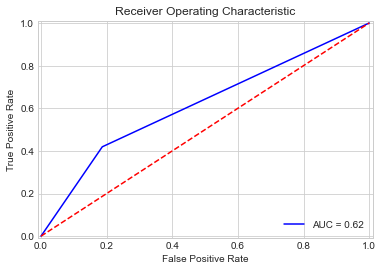

In [72]:
plot_roc_curve(y_test, probs_dt)

In [73]:
# Random Forest Classifier - Random Search for Hyperparameters

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {"max_depth": [10, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 20),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Run Randomized Search
n_iter_search = 10
rfc = RandomForestClassifier(n_estimators=10)
random_search = RandomizedSearchCV(rfc, 
                                   n_jobs = -1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 39.02 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.796 (std: 0.001)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 9, 'min_samples_leaf': 2, 'min_samples_split': 17}

Model with rank: 2
Mean validation score: 0.785 (std: 0.005)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 8, 'min_samples_split': 17}

Model with rank: 3
Mean validation score: 0.782 (std: 0.003)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 4, 'min_samples_split': 10}

Model with rank: 4
Mean validation score: 0.778 (std: 0.003)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 9, 'min_samples_split': 14}

Model with rank: 5
Mean validation score: 0.778 (std: 0.002)
Parameters: {'bootstrap': False, 'criterion': 'e

In [74]:
# Random Forest Classifier
start_time = time.time()
rfc = RandomForestClassifier(n_estimators=10, 
                             min_samples_leaf=2,
                             min_samples_split=17, 
                             criterion='gini', 
                             max_features=8)
train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf, probs_rf = fit_ml_algo(rfc, 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

Accuracy: 79.01
Accuracy CV 10-Fold: 79.04
Running Time: 0:00:12.917809


In [75]:
# Print the confusion matrix
print(metrics.classification_report(y_train, train_pred_rf))
print(metrics.classification_report(y_test, test_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     27977
           1       0.61      0.27      0.37      8473

    accuracy                           0.79     36450
   macro avg       0.71      0.61      0.62     36450
weighted avg       0.76      0.79      0.76     36450

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      3122
           1       0.60      0.24      0.35       928

    accuracy                           0.79      4050
   macro avg       0.71      0.60      0.61      4050
weighted avg       0.76      0.79      0.75      4050



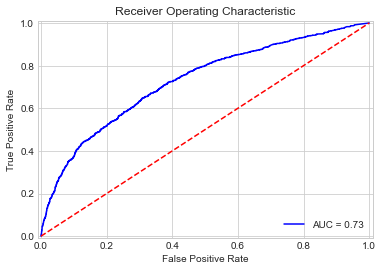

In [76]:
plot_roc_curve(y_test, probs_rf)

In [77]:
# Gradient Boosting Classifier
start_time = time.time()
train_pred_gbt, test_pred_gbt, acc_gbt, acc_cv_gbt, probs_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 81.78
Accuracy CV 10-Fold: 81.25
Running Time: 0:02:51.189186


In [78]:
# Print the confusion matrix
print(metrics.classification_report(y_train, train_pred_gbt))
print(metrics.classification_report(y_test, test_pred_gbt))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89     27977
           1       0.68      0.36      0.47      8473

    accuracy                           0.81     36450
   macro avg       0.76      0.66      0.68     36450
weighted avg       0.80      0.81      0.79     36450

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      3122
           1       0.71      0.35      0.47       928

    accuracy                           0.82      4050
   macro avg       0.77      0.65      0.68      4050
weighted avg       0.80      0.82      0.79      4050



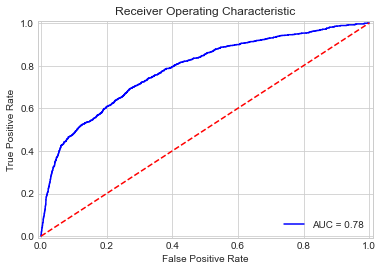

In [79]:
plot_roc_curve(y_test, probs_gbt)

### Part G: Machine Learning - Model Evaluation

In [80]:
# Compare all the models with their respective accuracy scores
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Descent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Classifier'],
    'Accuracy Score': [
        acc_knn, 
        acc_log, 
        acc_rf, 
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt
    ]})
models.sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score
7,Gradient Boosting Classifier,81.78
2,Random Forest,79.01
1,Logistic Regression,77.09
5,Linear SVC,77.09
6,Decision Tree,72.30
4,Stochastic Gradient Descent,70.49
0,KNN,69.48
3,Naive Bayes,62.64


In [81]:
# Compare all the models with their respective accuracy scores using 10-CV
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Descent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Classifier'],
    'Accuracy Score (10-CV)': [
        acc_cv_knn, 
        acc_cv_log,     
        acc_cv_rf, 
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt
    ]})
models.sort_values(by='Accuracy Score (10-CV)', ascending=False)

,Model,Accuracy Score (10-CV)
7,Gradient Boosting Classifier,81.25
2,Random Forest,79.04
1,Logistic Regression,76.74
6,Decision Tree,71.12
0,KNN,69.96
3,Naive Bayes,60.98
4,Stochastic Gradient Descent,60.12
5,Linear SVC,57.44


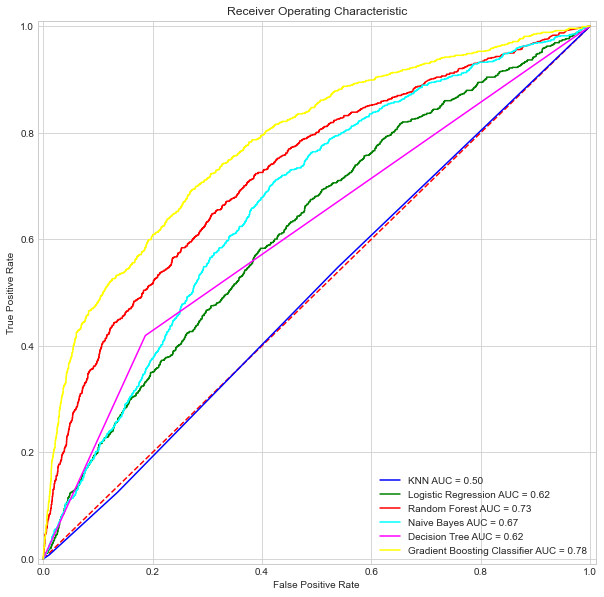

In [82]:
# Plot all the models to compare their ROC
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,10)) 

models = [
    'KNN', 
    'Logistic Regression', 
    'Random Forest', 
    'Naive Bayes', 
    'Decision Tree', 
    'Gradient Boosting Classifier'
]

probs = [
    probs_knn,
    probs_log,
    probs_rf,
    probs_gau,
    probs_dt,
    probs_gbt
]

colors = [
    'blue',
    'green',
    'red',
    'cyan',
    'magenta',
    'yellow',
]
    
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = metrics.roc_curve(y_test, prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
    plt.legend(loc = 'lower right')
    
for i, model in list(enumerate(models)):
    plot_roc_curves(y_test, probs[i], models[i])
    
plt.show()

### Part H: Preparing the test set for prediction

From above we found that Gradient Boosting Classifier using trees were the best classifiers and now we will use it to predict the category for 'fail_7' for the test set.

In [83]:
df_test = pd.read_csv("C:\\Users\\its_t\\Downloads\\Pitney Bowes\\test.csv")

In [84]:
# We repeat the data-processing, data wrangling steps here again and there is a reason
# why we chose to keep functions for those tasks as it can be replicated easily for test set

In [85]:
# Records - rows and columns
df_test.shape

# We see that there is one column less than our training dataset above as we have to predict 'fail_7' category

(4500, 54)

In [86]:
# Check for total null values
df_test.isnull().values.sum()

3980

In [87]:
# Null or NAs by column
naColumns = df_test.isnull().sum()

# Sort for top 20 with NAs
naColumns.sort_values()

deviceid                         0
discharging_rate_lag5            0
discharging_rate_lag6            0
charging_rate_lag4               0
charging_rate_lag5               0
charging_rate_lag6               0
chargecycles                     0
dischargecycles                  0
discharging_rate_lag4            0
total_off_time                   0
avg_volt_change_charging         0
avg_volt_change_discharging      0
avg_time_charging                0
avg_time_discharging             0
max_voltage_day                  0
piececount                       0
cycle_time                       0
number_times_restart             0
LastRecord                       0
Date Deployed                    0
avg_time_discharging_lag4        0
discharging_rate_lag3            0
avg_time_discharging_lag3        0
avg_time_charging_lag4           0
avg_time_discharging_lag1        0
avg_time_discharging_lag2        0
avg_time_charging_lag3           0
avg_time_charging_lag2           0
avg_time_charging_la

Text(0.5, 0, 'Top 20 variables with missing values')

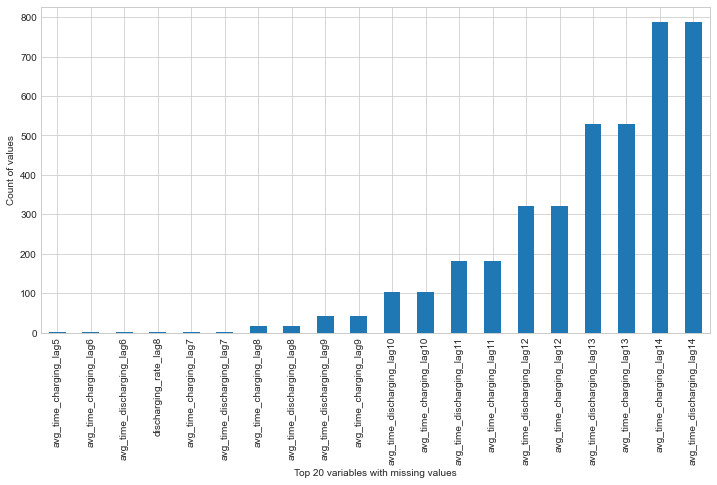

In [88]:
x = naColumns.sort_values().tail(20)

# Plot the count of missing NA values by features
x.plot.bar(figsize=(12,6))
plt.ylabel('Count of values')
plt.xlabel('Top 20 variables with missing values')

In [89]:
# Fill the missing NAs for rows now
filling(df_test)

In [90]:
# Should show no more NAs
df_test.isnull().values.sum()

0

In [91]:
# Dropping the features which are of object type but have no use in the feature selection or modeling
del df_test['LastRecord']
del df_test['Date Deployed']

### Part I: Predicting the 'fail_7' for test.csv

In [92]:
# Dropping the unique identifier from the train set and will be used later to recognise the categorical predictions
train = df.drop(['deviceid'], axis=1)

In [93]:
# To train on 100% of training data
train_data = train.drop('fail_7', axis=1)
target = train['fail_7']

In [94]:
train_data.head()

,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,...,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time
0,5.12,41.11,6.56,25.39,0.086667,-0.006667,4.37,91.70,15.70,39.12,...,49.750000,49.000000,2.375000,377.080000,367.428750,21.696250,39.005000,4174.875000,14.200000,60.701250
1,36.60,5.16,6.23,6.96,0.136667,-1.296667,62.67,6.53,6.16,8.25,...,56.000000,36.857143,1.000000,350.517857,350.309286,19.883571,32.213571,4161.000000,19.777778,52.097143
2,5.51,5.04,4.52,5.96,-0.460000,-0.083333,5.13,5.65,4.14,14.02,...,80.333333,2.333333,4.095238,346.113333,343.409524,13.675238,20.471429,4152.238095,19.200000,34.146667
3,4.66,39.85,35.76,40.69,0.076667,-0.006667,3.93,76.37,60.86,73.53,...,91.684211,10.789474,0.736842,356.184211,349.844737,16.306842,26.189474,4164.631579,23.625000,42.496316
4,5.10,43.24,4.63,5.26,0.040000,-0.153333,4.69,71.44,3.80,6.29,...,70.733333,14.266667,1.133333,370.904000,367.730000,18.797333,30.812000,4169.800000,12.666667,49.609333


In [95]:
clf = GradientBoostingClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, n_jobs=-1, scoring=scoring)
print(score)

[0.81839506 0.80802469 0.81691358 0.81160494 0.81296296]


In [96]:
scoreP = round(np.mean(score)*100, 2)
print('Our Gradient Boosting Classifier score for entire training dataset is ' + str(scoreP) + '%')

Our Gradient Boosting Classifier score for entire training dataset is 81.36%


**Note how when we run the Gradient Boosting Classifier for 100% data v/s 90% in our validation exercise above?
Accuracy is marginally different from 81.48 to 81.38%**

In [ ]:
# To use the feature selection method we applied earlier we must remove 'fail_7' feature from there as it is 
# not required for prediction and was also not given for the test set to avoid index mismatch error

In [88]:
#selector.support_

array([False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True])

In [90]:
# From the train dataset we can find the index of the column for fail_7 which was important predictor for us
# but is not there in the test data set

# column index can be found by using the original dataset as:
# df.columns.get_loc("fail_7") -- that's our index below

'''
index = 13
selector_new = selector.support_
selector_new = np.delete(selector_new, index)
'''

In [91]:
# df_test = df_test[df_test.columns[np.insert(selector_new, 0, True)]]

In [97]:
clf = GradientBoostingClassifier()
clf.fit(train_data, target)

test_data = df_test.drop("deviceid", axis=1).copy()
prediction = clf.predict(test_data)

In [98]:
category_pred_fail_7 = pd.DataFrame({
    'deviceid': df_test['deviceid'],
    'fail_7': prediction
})

In [99]:
category_pred_fail_7.head(10)

,deviceid,fail_7
0,42979,1
1,14911,0
2,48386,0
3,18822,0
4,49810,0
5,23495,0
6,30555,1
7,18316,0
8,17929,0
9,33374,0


In [95]:
# The result can be saved in csv with the following code:
# category_pred_fail_7.to_csv('pitney_bowes_challenge_prediction.csv', index=False)